# Get the embeddings
1. [x] Load Images
2. [x] Save Faces
3. [ ] Save Embeddings
4. [ ] Face Recognition with SVM

In [1]:
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import os

import random
from math import ceil

# Saving Faces

In [8]:
# create the new directory
if not os.path.exists('faces'):
    os.mkdir('faces')

for folder in os.listdir('images'):
    print('Folder:', folder)
    if not os.path.isdir(os.path.join('images', folder)):
        continue
    i = 0
    for image_name in os.listdir(os.path.join('images', folder)):
        # check if it's a file or not
        print(f'Saving:{image_name}')
        if not os.path.isfile(os.path.join('images', folder, image_name)):
            print('Not Saved')
            continue
        
        # load the image
        image = face_recognition.load_image_file(os.path.join('images', folder, image_name))
        # get the face(s) in the images
        face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model='cnn')
        
        for face_location in face_locations:
            top, right, bottom, left = face_location

            face_image = image[top:bottom, left:right]
            pil_image = Image.fromarray(face_image)

            # create the new directory for each person
            if not os.path.exists(os.path.join('faces', folder)):
                os.mkdir(f'faces/{folder}')
            # Save Images in sub-directories
            pil_image.save(f'faces/{folder}/{i}.png')
            i+=1

Folder: islam
Saving:47586390_289698141747452_7802567725579225207_n.jpg
Saving:51432335_147703996254414_2352554640678032344_n.jpg
Saving:54731535_2701263516611873_1366880948926064718_n.jpg
Saving:58410200_2109676525990933_3224435713558990314_n.jpg
Saving:69627551_141583693724699_4751258664151796436_n.jpg
Saving:70725710_401286780560141_2699430785934693928_n.jpg
Folder: moaz
Saving:71557316_759513154500319_8787256668162359296_n.jpg
Saving:IMG-20181003-WA0008.jpg
Saving:IMG-20190213-WA0020.jpg
Saving:IMG-20190511-WA0007 (1).jpg
Saving:IMG-20190511-WA0007.jpg
Saving:IMG-20200101-WA0042.jpg
Saving:IMG_20200225_150117.jpg
Folder: ziad
Saving:06880e1f-19fd-4dce-8af6-ac4ca7b9534c.jpeg
Saving:42cfafdc-8470-4600-aa05-726e415bc7e5.jpeg
Saving:4e1fd24c-9d0b-446b-a159-ae68fff8b879.jpeg
Saving:91d7c549-1daf-40e9-b608-ae37720571d8.jpeg
Saving:b3328e14-7f6b-40d8-a480-1402c3bdc7a7.jpeg
Saving:bb2664b0-0b30-451b-9e81-560036334ea9.jpeg
Saving:d244ddd5-6aef-428a-9cd8-64640e2798ed.jpeg
Saving:e5a39892-ee5

In [2]:
def shuffle(x):
    return sorted(x, key=lambda x:random.random())

In [3]:
def show_random_faces(num=5):
    images = []
    i = 0 
    if os.path.exists('faces'):
        for folder in shuffle(os.listdir('faces')):
            if os.path.isdir(os.path.join('faces', folder)) and num!=i:
                for image in shuffle(os.listdir(os.path.join('faces', folder))):
                    if os.path.isfile(os.path.join('faces', folder, image)):
                        images.append([folder, image])
                        i+=1
                        break
    if num in [1, 2, 3]:
        fig = plt.figure(figsize=(4, 4))
    else:
        fig = plt.figure(figsize=(num, num))
    s = ceil(num/2)
    if s == 1:s=2
    for i in range(1, s*s+1):
        if i-1==len(images):break
        img = plt.imread(f'faces/{images[i-1][0]}/{images[i-1][1]}')
        fig.add_subplot(s, s, i)
        plt.title(images[i-1][0])
        plt.imshow(img)
    fig.tight_layout()
    plt.show()

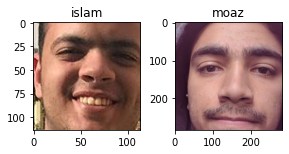

In [4]:
show_random_faces(10)

# Saving Embeddings

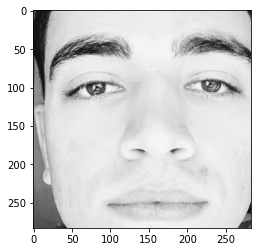

In [5]:
img = face_recognition.load_image_file('faces/moaz/4.png')
plt.imshow(img)